In [ ]:
# 以前作ったカルマンフィルタのシミュレーションコード

C:\Users\First User\AppData\Local\Temp\ipykernel_13288\141078574.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  filtered_x.append(float(x)) #記録
C:\Users\First User\AppData\Local\Temp\ipykernel_13288\141078574.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g_list.append(float(g)) #カルマンゲインと共分散行列の推移も気になった。
C:\Users\First User\AppData\Local\Temp\ipykernel_13288\141078574.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p_list.append(float(P))


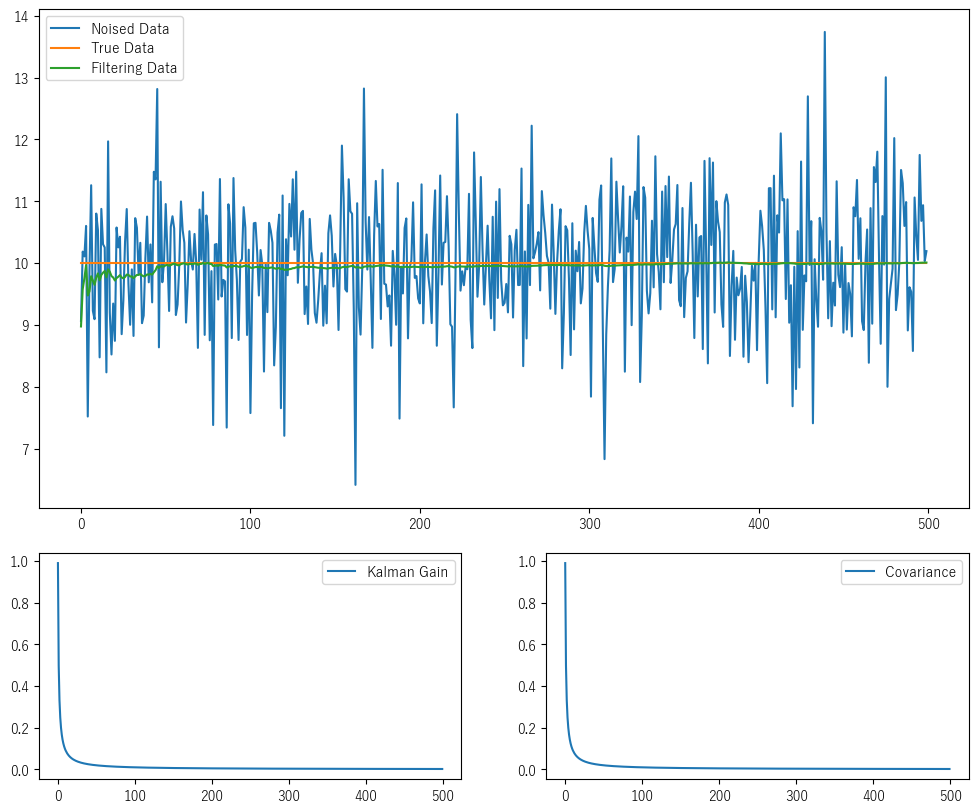

In [4]:
#理解度の低さがあらわになるコード
#初めは簡単にノイズが乗った定数地を推定

import math
import numpy as np
import matplotlib.pyplot as plt

n = 500 #データ数

sv2 = 0 #vの分散 (モデルの分散。つまり、モデルの不確実さでもある。)
sw2 = 1 #wの分散 (観測値の分散。)
true_y = np.zeros(n)+10 #時系列データ (ただの定数データ)
y = true_y+np.random.normal(0, 1, n)*math.sqrt(sw2) #ノイズを加えた時系列データ。フィルタリングするデータ。
#とはいえ、正規分布に従うとても理想的なノイズ。

# x(k) = Ax(k-1) +bv(k)
# y(k) = cx(k) +w(k)

x = np.array([0]) #状態変数の初期値
A = np.array([[1]]) #次の時刻への変換係数的な物。（名前がわからない
b = np.array([1]) #ノイズの係数的な物、（名前がわからない
c = np.array([1]) #観測値への変換係数的な物　（名前がわからない
P = np.array([[100]]) #分散共分散行列の初期値

filtered_x = [] #フィルタリング結果の記録

g_list = [] #カルマンゲインの推移も気になった。
p_list = [] #分散行列の推移も気になった

for yk in y:
    x_ = A@x #事前推定値
    P_ = A@P@A.T+sv2*b@b.T #事前共分散

    g = (P_@c)/(c.T@P@c+sw2) #カルマンゲイン
    x = x_+g*(yk-c.T@x) #事後推定値
    P = (np.eye(1)-g@c.T)@P_ #事後共分散

    filtered_x.append(float(x)) #記録
    g_list.append(float(g)) #カルマンゲインと共分散行列の推移も気になった。
    p_list.append(float(P))


fig = plt.figure(figsize=(12, 10)) #figre
ax0 = fig.add_subplot(3, 1, (1, 2))
ax1 = fig.add_subplot(3, 2, 5)
ax2 = fig.add_subplot(3, 2, 6)

ax0.plot(np.arange(n), y, label="Noised Data") #フィルタリングのプロット
ax0.plot(np.arange(n), true_y, label="True Data")
ax0.plot(np.arange(n), filtered_x, label="Filtering Data")
ax0.legend()

ax1.plot(np.arange(n), g_list, label="Kalman Gain") #パラメータのプロット (p, g)
ax2.plot(np.arange(n), p_list, label="Covariance")
ax1.legend()
ax2.legend()

plt.show()

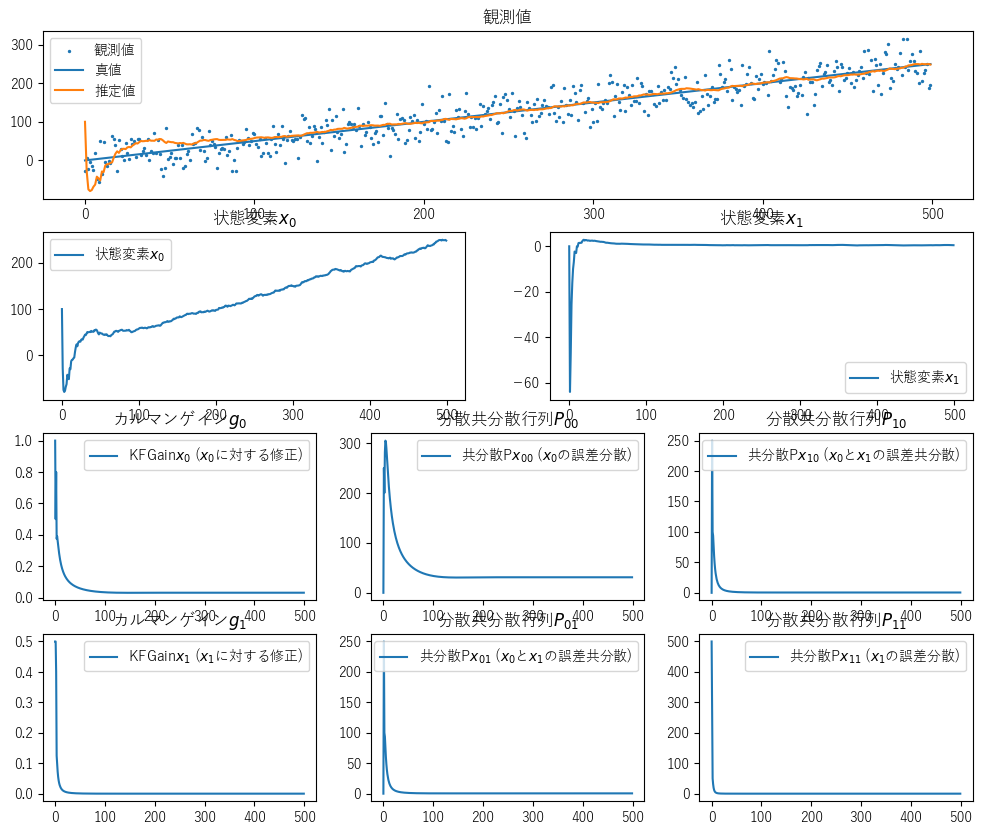

In [12]:
#初めの推定がうまく行ったため、もう少しむずかしく。
#具体的には、時系列データがy=ax+bの一次関数の時、aとbの2変数を逐次的に推定したい。
#作った結果、このモデルの場合、sw2(観測値の分散)が小さいと、推定中のどこかでスパイクが発生する。理由がわからない。(考えたくないからかもですが)

import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif' #日本語フォントの設定らしい。（コピペ）
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

n = 500 #時系列データのデータ数

sv2 = 0.001 #モデルの分散
sw2 = 1000 #観測系の分散

alpha = 0.5 #y=あるふぁ*x+β
beta = 0 #y=α*x+べーた
true_x = np.asarray([np.arange(n)*alpha+beta, np.zeros(n)+alpha]).reshape(2, n).T #時系列データ (ただの一次関数)
y = true_x[:, 0]+np.random.normal(0, math.sqrt(sw2), n) #ノイズを加えた時系列データ。フィルタリングするデータ。

x = np.array([100, 0]).reshape(2, 1) #状態変数の初期値
A = np.array([[1, 1], [0, 1]]) #次の時刻への変換係数的な物。（名前がわからない
# ↑y=ax+bの時、aとbを逐次的に推定したい。
b = np.array([0.2, 0.5]).reshape(2, 1) #ノイズの係数的な物、（名前がわからない
c = np.array([1, 0]).reshape(2, 1) #観測値への変換係数的な物　（名前がわからない
P = np.eye(2)*1000 #分散共分散行列の初期値

result_x = [] #フィルタリング結果の記録
result_g = [] #カルマンゲインの推移も気になった。
result_p = [] #分散行列の推移も気になった

for yk in y:
    result_x.append(x) #記録
    x_ = A@x #事前推定値
    P_ = A@P@A.T+sv2*b@b.T #事前共分散

    g = (P_@c)/(c.T@P@c+sw2) #カルマンゲイン
    x = x_+g*(yk-c.T@x) #事後推定値
    P = (np.eye(2)-g@c.T)@P_ #事後共分散

    result_g.append(g) #カルマンゲインと共分散行列の推移も気になった。
    result_p.append(P)

result_x = np.asarray(result_x)
result_g = np.asarray(result_g)
result_p = np.asarray(result_p)

def plot(y, axobject, label=""):
    axobject.plot(np.arange(len(y)), y, label=label)
    axobject.legend()

fig = plt.figure(figsize=(12, 10)) #figre
ax_y = fig.add_subplot(4, 1, 1)
ax_x0 = fig.add_subplot(4, 2, 3)
ax_x1 = fig.add_subplot(4, 2, 4)
ax_g0 = fig.add_subplot(4, 3, 7)
ax_g1 = fig.add_subplot(4, 3, 10)
ax_p00 = fig.add_subplot(4, 3, 8)
ax_p10 = fig.add_subplot(4, 3, 9)
ax_p01 = fig.add_subplot(4, 3, 11)
ax_p11 = fig.add_subplot(4, 3, 12)

ax_y.set_title("観測値")
ax_x0.set_title("状態変素$x_0$")
ax_x1.set_title("状態変素$x_1$")
ax_g0.set_title("カルマンゲイン$g_0$")
ax_g1.set_title("カルマンゲイン$g_1$")
ax_p00.set_title(r"分散共分散行列$P_{00}$")
ax_p10.set_title(r"分散共分散行列$P_{10}$")
ax_p01.set_title(r"分散共分散行列$P_{01}$")
ax_p11.set_title(r"分散共分散行列$P_{11}$")

ax_y.scatter(np.arange(len(y)), y, label="観測値", s=2)
plot(true_x[:, 0], ax_y, label="真値")
plot(result_x[:, 0], ax_y, label="推定値")
plot(result_x[:, 0], ax_x0, label="状態変素$x_0$")
plot(result_x[:, 1], ax_x1, label="状態変素$x_1$")
plot(result_g[:, 0], ax_g0, label="KFGain$x_0$ ($x_0$に対する修正)")
plot(result_g[:, 1], ax_g1, label="KFGain$x_1$ ($x_1$に対する修正)")
plot(result_p[:, 0, 0], ax_p00, label=r"共分散P$x_{00}$ ($x_0$の誤差分散)")
plot(result_p[:, 0, 1], ax_p01, label=r"共分散P$x_{01}$ ($x_0$と$x_1$の誤差共分散)")
plot(result_p[:, 1, 0], ax_p10, label=r"共分散P$x_{10}$ ($x_0$と$x_1$の誤差共分散)")
plot(result_p[:, 1, 1], ax_p11, label=r"共分散P$x_{11}$ ($x_1$の誤差分散)")

plt.show()

C:\Users\First User\AppData\Local\Temp\ipykernel_13288\3064191883.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result_y.append(float(c.T@x))


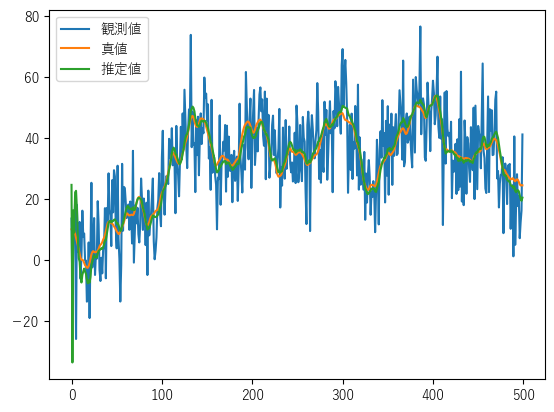

In [13]:
# 入力があるの場合 と思ったが、少し違うかも。これだと通常の場合と何も変わらぬ
# なおかつ、ノイズを一様分布とした。
# 入力の時系列データはテキトウなMAモデル

import math
import numpy as np
import matplotlib.pyplot as plt

n = 500

sv2 = 0.01
sw2 = 100 

u = np.random.random(n)-0.5
u = u+np.roll(u, 1)*0.5+np.roll(u, -1)*0.5

true_x = [10]
temp_dx = 0
for uk in u[1:]:
    temp_dx *= 0.8
    temp_dx += uk
    true_x.append(true_x[-1]+temp_dx)

y = true_x+np.random.normal(0, math.sqrt(sw2), n)

x = np.array([0, 0]).reshape(2, 1) 
A = np.array([[1, 1], [0, 0.8]]) 
b = np.array([0, 1]).reshape(2, 1) 
c = np.array([1, 0]).reshape(2, 1) 
P = np.eye(2)*1000

result_y = []

for yk, uk in zip(y, u):
    x_ = A@x+b*uk
    P_ = A@P@A.T+sv2*b@b.T 

    g = (P_@c)/(c.T@P@c+sw2) 
    x = x_+g*(yk-c.T@x) 
    P = (np.eye(2)-g@c.T)@P_ 
    
    result_y.append(float(c.T@x)) 

plot(y, plt, label="観測値")
plot(true_x, plt, label="真値")
plot(result_y, plt, label="推定値")

plt.show()